In [1]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pylab as plt
import gzip

In [11]:
def most_pop_genre(path):
    '''
    path: path to folder containing each year's movies
    '''
    genres_per_year = {}
    genres = []
    for file in os.listdir(path):
        yearly = []
        year = os.path.splitext(file)[0]
        year = int(year)
        filename = os.path.join('genre', file)
        data = pd.read_csv(filename, header = None)
        for genre in data[2]:
            cleaned = (genre.replace("'", '').replace("[", '').replace("]", '').replace("\\n", ''))
            cleaned = cleaned.split(', ')
            for elem in cleaned:
                if elem != '':
                    genres.append(elem.strip())
                    yearly.append(elem.strip())
        yearly = Counter(yearly)
        genres_per_year[year] = max(yearly, key=yearly.get)
    return genres_per_year, genres
genres_per_year, genres = most_pop_genre('genre')

In [9]:
genres_per_year

{1946: 'Western',
 1997: 'Drama',
 1941: 'Comedy',
 1990: 'Drama',
 1934: 'Drama',
 1948: 'Western',
 2007: 'Drama',
 1974: 'Drama',
 1973: 'Drama',
 1962: 'Drama',
 1965: 'Comedy',
 1988: 'Drama',
 1959: 'Drama',
 1981: 'Comedy',
 1950: 'Western',
 1986: 'Comedy',
 1957: 'Drama',
 2008: 'Comedy',
 1972: 'Drama',
 1975: 'Drama',
 2001: 'Comedy',
 2006: 'Comedy',
 1935: 'Drama',
 1949: 'Western',
 1998: 'Comedy',
 1940: 'Drama',
 1991: 'Drama',
 1947: 'Western',
 1996: 'Drama',
 1987: 'Comedy',
 1956: 'Western',
 1980: 'Comedy',
 1951: 'Western',
 1989: 'Drama',
 1958: 'Drama',
 1964: 'Comedy',
 1963: 'Drama',
 1983: 'Drama',
 1952: 'Western',
 1984: 'Comedy',
 1955: 'Drama',
 1969: 'Drama',
 1960: 'Drama',
 1967: 'Comedy',
 1976: 'Drama',
 1971: 'drama',
 2005: 'Comedy',
 1978: 'Drama',
 2002: 'Comedy',
 1936: 'Drama',
 1938: 'Comedy',
 1944: 'Western',
 1995: 'Drama',
 1943: 'Western',
 1992: 'Comedy',
 1966: 'Comedy',
 1961: 'Drama',
 1968: 'Comedy',
 1985: 'Comedy',
 1954: 'Western'

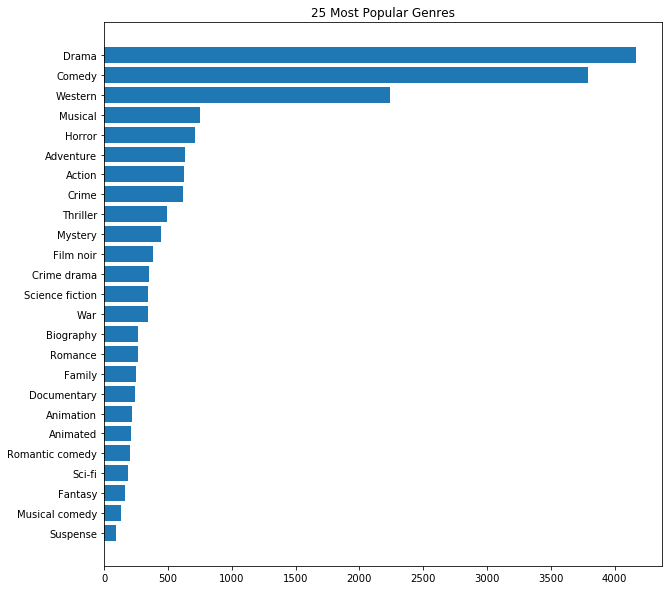

In [20]:
def plot_top_25(lst, title):
    '''
    lst: list of genres to plot
    title: string of title of plot
    '''
    counter = Counter(lst)
    if None in counter:
        counter.pop(None)
    top = counter.most_common(25)
    top = reversed(top)
    top = (dict(top))
    plt.figure(figsize = (10, 10))
    plt.barh(range(len(top)), top.values())
    plt.yticks(range(len(top)), top.keys())
    plt.title(title)
    plt.show()
    
plot_top_25(genres, '25 Most Popular Genres')

# all_genres = Counter(genres)
# top = all_genres.most_common(25)
# top = reversed(top)
# top = (dict(top))
# plt.figure(figsize = (10, 10))

# plt.barh(range(len(top)), top.values())
# plt.yticks(range(len(top)), top.keys())
# plt.title('25 Most Popular Genres')
# plt.show()

In [13]:
# file = '2004.csv'

# genres = []
# year = os.path.splitext('1988.csv')[0]
# filename = os.path.join('genre', file)
# data = pd.read_csv(filename, header = None)
# data.head()
# for genre in data[2]:
#     cleaned = (genre.replace("'", '').replace("[", '').replace("]", '').replace("\\n", ''))
#     cleaned = cleaned.split(', ')
#     for elem in cleaned:
#         if elem != '':
#             genres.append(elem.strip())
# genres

In [24]:
actors = pd.read_csv('actorsWithEthnicity.csv')
actors.head()

,Year,Actor,Role,Movie,Link,Winner,Ethnicity
0,1934,Clark Gable,Peter Warne,It Happened One Night,https://en.wikipedia.org//wiki/It_Happened_One...,True,"['German', 'Irish', 'SwissGerman', 'Belgian']"
1,1934,Frank Morga,"Alessandro, Duke of Florence",The Affairs of Cellini,https://en.wikipedia.org//wiki/The_Affairs_of_...,False,[]
2,1934,William Powel,Nick Charles,The Thin Man,https://en.wikipedia.org//wiki/The_Thin_Man_(f...,False,[]
3,1935,Victor McLaglen,Gypo Nolan,The Informer,https://en.wikipedia.org//wiki/The_Informer_(1...,True,"['Afrikaner', 'Dutch', 'German', 'Irish', 'Sco..."
4,1935,Clark Gabl,Lieutenant Fletcher Christian,Mutiny on the Bounty,https://en.wikipedia.org//wiki/Mutiny_on_the_B...,False,"['German', 'Irish', 'SwissGerman', 'Belgian']"


In [27]:
def oscars_genres(oscars_file, path):
    '''
    oscars_file: csv for oscars nominations/winners
    path: path to folder containing each year's movies
    '''
    genre_list = []
    for i, row in oscars_file.iterrows():
        year = row['Year']
        file = str(year)+'.csv'
        if year not in [1999, 2000] and year < 2008:
            filename = os.path.join(path, file)
            data = pd.read_csv(filename, header = None)
            movie = row['Movie']
            genre = data[data[0] == movie][2].values
            if len(genre) == 0:
                cleaned == None
            else:
                genre = genre[0]
                cleaned = (genre.replace("'", '').replace("[", '').replace("]", '').replace("\\n", ''))
                cleaned = str(cleaned).split(', ')
                cleaned = cleaned[0]

        else:
            cleaned = None
        genre_list.append(cleaned)
    return genre_list
        
genre_list = oscars_genres(actors, 'genre')
genre_list

['Comedy',
 'Historical comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Biography',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Mystery',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Epic Drama',
 'Romantic Drama',
 'Musical',
 'Drama',
 'Screwball comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Suspense',
 'War',
 'Melodrama',
 'Fantasy',
 'Comedy',
 'Drama',
 'Biography',
 'Drama',
 'Biopic',
 'War drama',
 'War',
 'Drama',
 'Drama',
 'War Drama',
 'Biography',
 'Drama',
 'Musical comedy',
 'Film noir',
 'Musical comedy',
 'Musical comedy',
 'Bio-pic',
 'Drama',
 'Drama',
 'Musical',
 'Musical',
 'Biography',
 'Drama',
 'Drama',
 'Drama',
 'Family',
 'Fantasy',
 'Film noir',
 'Film noir',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Musical',
 'Comedy',
 'Drama',
 'Film noir',
 'War drama',
 'Drama',
 'War',
 'Adventure',
 'Biographical',
 'Film noir',
 'Fantasy',
 'Fantasy',
 'Drama',
 'Dram

In [28]:
actors['genre'] = genre_list
actors.head()

,Year,Actor,Role,Movie,Link,Winner,Ethnicity,genre
0,1934,Clark Gable,Peter Warne,It Happened One Night,https://en.wikipedia.org//wiki/It_Happened_One...,True,"['German', 'Irish', 'SwissGerman', 'Belgian']",Comedy
1,1934,Frank Morga,"Alessandro, Duke of Florence",The Affairs of Cellini,https://en.wikipedia.org//wiki/The_Affairs_of_...,False,[],Historical comedy
2,1934,William Powel,Nick Charles,The Thin Man,https://en.wikipedia.org//wiki/The_Thin_Man_(f...,False,[],Comedy
3,1935,Victor McLaglen,Gypo Nolan,The Informer,https://en.wikipedia.org//wiki/The_Informer_(1...,True,"['Afrikaner', 'Dutch', 'German', 'Irish', 'Sco...",Drama
4,1935,Clark Gabl,Lieutenant Fletcher Christian,Mutiny on the Bounty,https://en.wikipedia.org//wiki/Mutiny_on_the_B...,False,"['German', 'Irish', 'SwissGerman', 'Belgian']",Drama


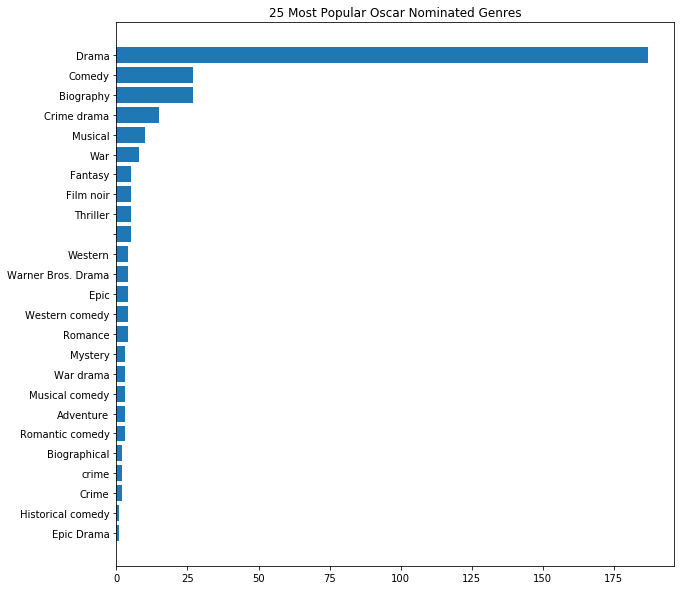

In [21]:
   
plot_top_25(genre_list, '25 Most Popular Oscar Nominated Genres')


# nom_genres = Counter(genre_list)
# nom_genres.pop(None)
# top = nom_genres.most_common(25)
# top = reversed(top)
# top = (dict(top))
# plt.figure(figsize = (10, 10))

# plt.barh(range(len(top)), top.values())
# plt.yticks(range(len(top)), top.keys())
# plt.title('25 Most Popular Oscar Nominated Genres')
# plt.show()

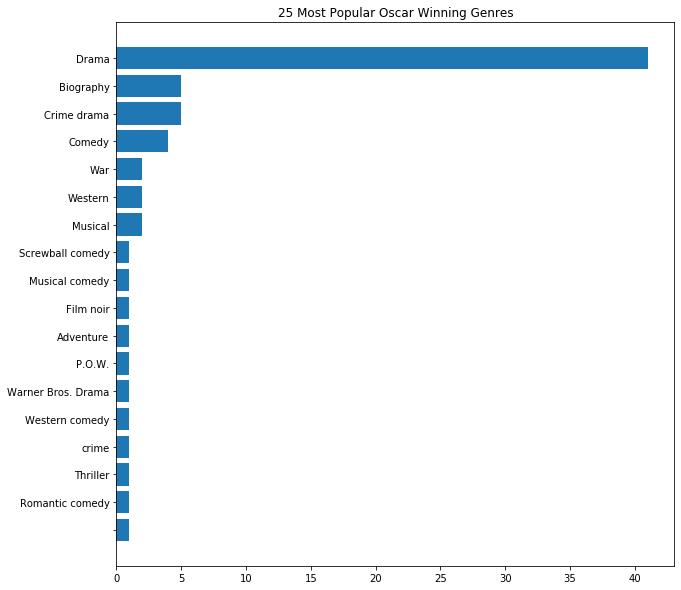

In [22]:
winners = actors[actors[' Winner'] == True]
# win_genres = Counter(winners['genre'])
# win_genres.pop(None)
# top = win_genres.most_common(25)
# top = reversed(top)
# top = (dict(top))
# plt.figure(figsize = (10, 10))

# plt.barh(range(len(top)), top.values())
# plt.yticks(range(len(top)), top.keys())
# plt.title('25 Most Popular Oscar Winning Genres')
# plt.show()

plot_top_25(winners['genre'], '25 Most Popular Oscar Winning Genres')


In [23]:
# year = 1998
# file = "1998"+'.csv'
# if year not in [1999, 2000] and year < 2008:
#     filename = os.path.join('genre', file)
#     data = pd.read_csv(filename, header = None)
#     #movie = row['Movie']
#     movie = 'Saving Private Ryan'
#     data[0] = data[0].str.strip()
#     genre = data[data[0] == movie][2].values[0]
    
# #     genre = str(genre)
#     cleaned = (genre.replace("'", '').replace("[", '').replace("]", '').replace("\\n", ''))
# #     #cleaned = str(cleaned)
#     cleaned = cleaned.split(', ')
#     print(cleaned[0])
# # data.head()
# #print(data[0][200:2200])
# # data[0].str.strip()
# #print(filename)
# #(genre[2].values[0])
# genre
# cleaned

In [281]:
with gzip.open("name.basics.tsv.gz") as f:
    ages = pd.read_csv(f, error_bad_lines = False, sep = '\t')
ages.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0043044,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0054452,tt0057345,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [290]:
ages = ages[['primaryName', 'birthYear', 'deathYear']]
ages['birthYear'] = pd.to_numeric(ages['birthYear'], errors = 'coerce')
ages['deathYear'] = pd.to_numeric(ages['deathYear'], errors = 'coerce')

ages = ages[ages['birthYear'] >= 1934]

In [293]:
ages.to_csv('ages.csv', index = False)

In [294]:
act_ages = pd.read_csv('ages.csv')
act_ages.head()

,primaryName,birthYear,deathYear
0,Brigitte Bardot,1934.0,NaN
1,John Belushi,1949.0,1982.0
2,Margaux Hemingway,1954.0,1996.0
3,James Horner,1953.0,2015.0
4,Bruce Lee,1940.0,1973.0


In [296]:
with_ages = actors.merge(act_ages, left_on = 'Actor', right_on = 'primaryName', how = 'left')
with_ages.head()

,Year,Actor,Role,Movie,Link,Winner,Ethnicity,genre,primaryName,birthYear,deathYear
0,1934,Clark Gable,Peter Warne,It Happened One Night,https://en.wikipedia.org//wiki/It_Happened_One...,True,"['German', 'Irish', 'SwissGerman', 'Belgian']",Comedy,NaN,NaN,NaN
1,1934,Frank Morga,"Alessandro, Duke of Florence",The Affairs of Cellini,https://en.wikipedia.org//wiki/The_Affairs_of_...,False,[],Historical comedy,NaN,NaN,NaN
2,1934,William Powel,Nick Charles,The Thin Man,https://en.wikipedia.org//wiki/The_Thin_Man_(f...,False,[],Comedy,NaN,NaN,NaN
3,1935,Victor McLaglen,Gypo Nolan,The Informer,https://en.wikipedia.org//wiki/The_Informer_(1...,True,"['Afrikaner', 'Dutch', 'German', 'Irish', 'Sco...",Drama,NaN,NaN,NaN
4,1935,Clark Gabl,Lieutenant Fletcher Christian,Mutiny on the Bounty,https://en.wikipedia.org//wiki/Mutiny_on_the_B...,False,"['German', 'Irish', 'SwissGerman', 'Belgian']",Drama,NaN,NaN,NaN


In [298]:
len(actors)

428